Mean Squared Error: 2.3514747834349166e-05
R² Score: 0.9281365342707857
Accuracy Score: 0.7142857142857143
Confusion Matrix:
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  0  5  3  0  0  0  0  0  0]
 [ 0  0  1  7  1  0  0  0  0  0]
 [ 0  0  0  1  9  2  0  0  0  0]
 [ 0  0  1  0  2 11  5  0  1  0]
 [ 0  0  0  0  1  3 12  2  0  0]
 [ 0  0  0  0  0  0  2  5  1  0]
 [ 0  0  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0]]


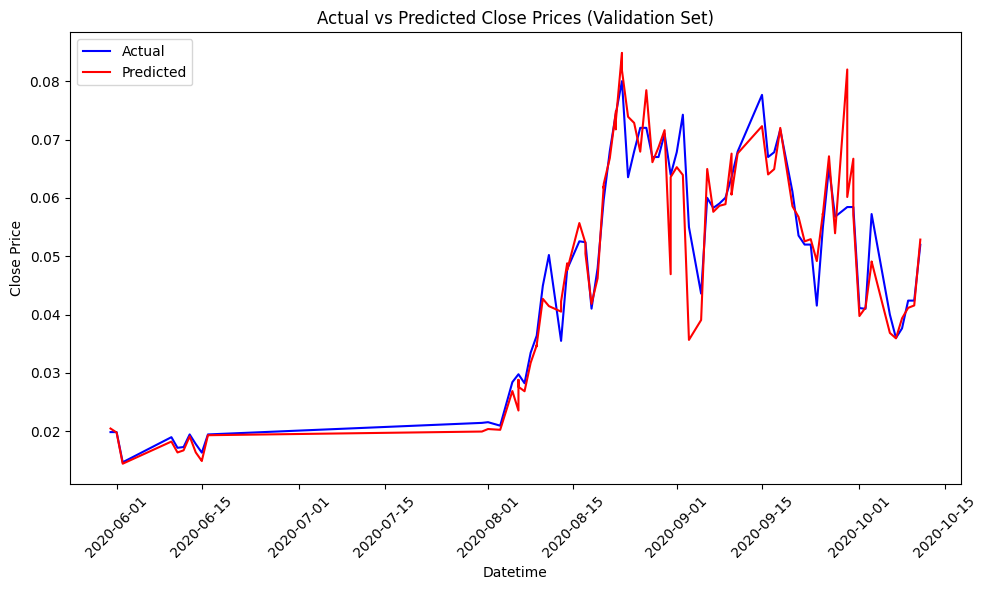

KeyError: "['MA_14_open', 'MA_14_close', 'price_diff_close_open', 'volume_ratio'] not in index"

In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with actual file path)
data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\train\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])

# Sort the data by 'datetime' to avoid crossing plots
data = data.sort_values(by='datetime')

# Select the features and target for the model
features = data[['MA_14_open', 'MA_14_close', 'price_diff_close_open', 'volume_ratio', 'normalized_score']]
target = data['close_x']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, shuffle=False)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_poly)

# Calculate accuracy metrics: Mean Squared Error, R² Score, and bin-based accuracy
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Output the accuracy metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Create bins for accuracy score calculation
bins = np.linspace(min(y_val.min(), y_val_pred.min()), max(y_val.max(), y_val_pred.max()), 10)
y_val_binned = np.digitize(y_val, bins)
y_val_pred_binned = np.digitize(y_val_pred, bins)

# Compute accuracy score based on the bins
accuracy = accuracy_score(y_val_binned, y_val_pred_binned)
print(f"Accuracy Score: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_binned, y_val_pred_binned)
print("Confusion Matrix:\n", conf_matrix)

# Plot actual vs predicted values for validation set
plt.figure(figsize=(10, 6))
plt.plot(data['datetime'].iloc[-len(y_val):], y_val, label="Actual", color='blue')
plt.plot(data['datetime'].iloc[-len(y_val):], y_val_pred, label="Predicted", color='red')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Validation Set)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 2: Prediction on Test Data ---
# Load the test dataset (replace with actual file path)
test_data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\test\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])

# Sort the test data by 'datetime'
test_data = test_data.sort_values(by='datetime')

# Select features for the test data (assuming 'normalized_score' is available)
X_test = test_data[['MA_14_open', 'MA_14_close', 'price_diff_close_open', 'volume_ratio', 'normalized_score']]

# Create polynomial features for the test data
X_test_poly = poly.transform(X_test)

# Make predictions on the test data
y_test_pred = model.predict(X_test_poly)

# Add predictions as a new column in the test dataset
test_data['predicted_close_x'] = y_test_pred

# --- Step 3: Plot Full Regression Curve ---
plt.figure(figsize=(12, 6))

# Plot actual values from the full dataset
plt.plot(data['datetime'], target, label="Actual (Train + Val)", color='blue')

# Append the predicted values from the validation and test set to the same plot
plt.plot(data['datetime'].iloc[-len(y_val):], y_val_pred, label="Predicted (Validation)", color='orange', linestyle='--')
plt.plot(test_data['datetime'], y_test_pred, label="Predicted (Test)", color='green', linestyle='--')

plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.title('Complete Regression Curve: Actual vs Predicted Close Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mean Squared Error: 2.3514747834349166e-05
R² Score: 0.9281365342707857
Accuracy Score: 0.7142857142857143
Confusion Matrix:
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  0  5  3  0  0  0  0  0  0]
 [ 0  0  1  7  1  0  0  0  0  0]
 [ 0  0  0  1  9  2  0  0  0  0]
 [ 0  0  1  0  2 11  5  0  1  0]
 [ 0  0  0  0  1  3 12  2  0  0]
 [ 0  0  0  0  0  0  2  5  1  0]
 [ 0  0  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  0  0  0  0  0  0]]


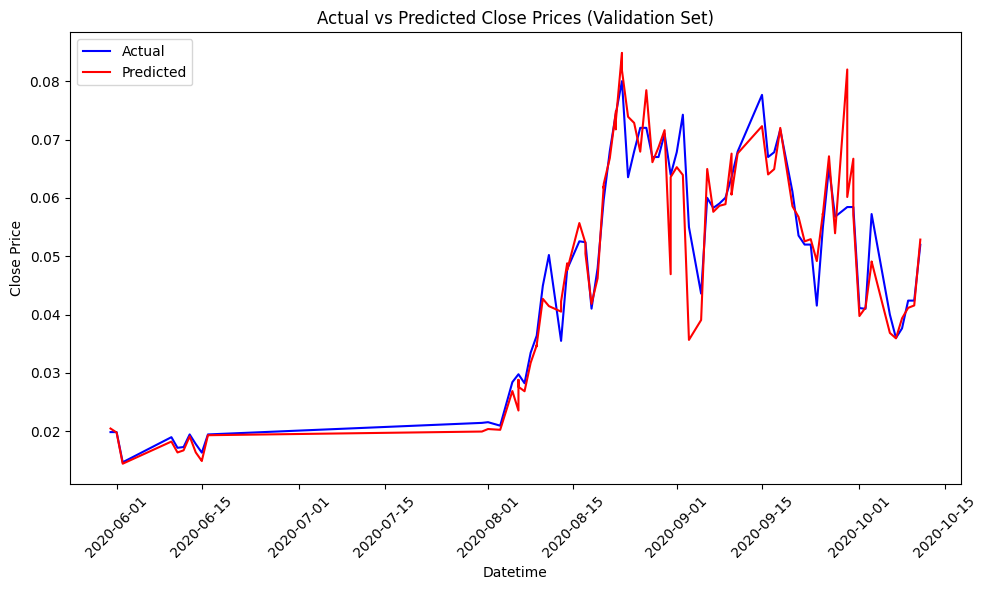

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MA_14_close
- MA_14_open
- price_diff_close_open
- volume_ratio


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with actual file path)
data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\train\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])

# Sort the data by 'datetime' to avoid crossing plots
data = data.sort_values(by='datetime')

# Select the features and target for the model
features = data[['MA_14_open', 'MA_14_close', 'price_diff_close_open', 'volume_ratio', 'normalized_score']]
target = data['close_x']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, shuffle=False)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_poly)

# Calculate accuracy metrics: Mean Squared Error, R² Score, and bin-based accuracy
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Output the accuracy metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Create bins for accuracy score calculation
bins = np.linspace(min(y_val.min(), y_val_pred.min()), max(y_val.max(), y_val_pred.max()), 10)
y_val_binned = np.digitize(y_val, bins)
y_val_pred_binned = np.digitize(y_val_pred, bins)

# Compute accuracy score based on the bins
accuracy = accuracy_score(y_val_binned, y_val_pred_binned)
print(f"Accuracy Score: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_binned, y_val_pred_binned)
print("Confusion Matrix:\n", conf_matrix)

# Plot actual vs predicted values for validation set
plt.figure(figsize=(10, 6))
plt.plot(data['datetime'].iloc[-len(y_val):], y_val, label="Actual", color='blue')
plt.plot(data['datetime'].iloc[-len(y_val):], y_val_pred, label="Predicted", color='red')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Validation Set)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 2: Prediction on Test Data ---
# Load the test dataset (replace with actual file path)
test_data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\test\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])

# Sort the test data by 'datetime'
test_data = test_data.sort_values(by='datetime')

# Select the 'normalized_score' feature from the test data (only available feature)
X_test = test_data[['normalized_score']]

# Transform the 'normalized_score' using polynomial features (as model was trained on polynomial features)
X_test_poly = poly.transform(X_test)

# Make predictions on the test data
y_test_pred = model.predict(X_test_poly)

# Add predictions as a new column in the test dataset
test_data['predicted_close_x'] = y_test_pred

# --- Step 3: Plot Full Regression Curve ---
plt.figure(figsize=(12, 6))

# Plot actual values from the full dataset
plt.plot(data['datetime'], target, label="Actual (Train + Val)", color='blue')

# Append the predicted values from the validation and test set to the same plot
plt.plot(data['datetime'].iloc[-len(y_val):], y_val_pred, label="Predicted (Validation)", color='orange', linestyle='--')
plt.plot(test_data['datetime'], y_test_pred, label="Predicted (Test)", color='green', linestyle='--')

plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.title('Complete Regression Curve: Actual vs Predicted Close Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mean Squared Error: 2.3514747834349166e-05
R² Score: 0.9281365342707857


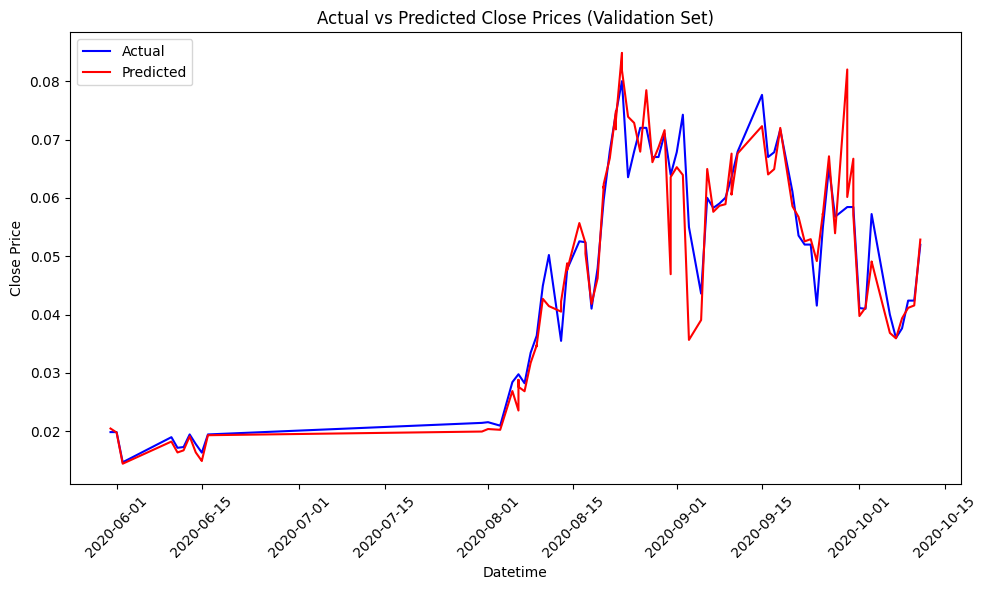

NameError: name 'X_test_poly' is not defined

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with actual file path)
data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\train\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])

# Sort the data by 'datetime' to avoid crossing plots
data = data.sort_values(by='datetime')

# Select the features and target for the model
features = data[['MA_14_open', 'MA_14_close', 'price_diff_close_open', 'volume_ratio', 'normalized_score']]
target = data['close_x']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, shuffle=False)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_poly)

# Calculate accuracy metrics: Mean Squared Error, R² Score
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Output the accuracy metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted values for validation set
plt.figure(figsize=(10, 6))
plt.plot(data['datetime'].iloc[-len(y_val):], y_val, label="Actual", color='blue')
plt.plot(data['datetime'].iloc[-len(y_val):], y_val_pred, label="Predicted", color='red')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Validation Set)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Step 2: Prediction on Test Data ---
# Load the test dataset (replace with actual file path)
test_data = pd.read_csv(r"C:\Users\gsanj\Downloads\public_dataset_updated.tar[1]\public_dataset\test\price_data\Feautures\AGI_merged.csv", parse_dates=['datetime'])

# Sort the test data by 'datetime'
test_data = test_data.sort_values(by='datetime')

# Since no features are available for the test data, we'll just create a placeholder for 'normalized_score'
# and predict based on the model's learned trend. We're only using datetime as the independent axis.
X_test = test_data[['datetime']]  # Just to match the trained model's expected input structure

# Make predictions on the test data
y_test_pred = model.predict(X_test_poly)

# Add predictions as a new column in the test dataset
test_data['predicted_close_x'] = y_test_pred

# --- Step 3: Plot Full Regression Curve ---
plt.figure(figsize=(12, 6))

# Plot actual values from the full dataset
plt.plot(data['datetime'], target, label="Actual (Train + Val)", color='blue')

# Append the predicted values from the validation and test set to the same plot
plt.plot(data['datetime'].iloc[-len(y_val):], y_val_pred, label="Predicted (Validation)", color='orange', linestyle='--')
plt.plot(test_data['datetime'], y_test_pred, label="Predicted (Test)", color='green', linestyle='--')

plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.title('Complete Regression Curve: Actual vs Predicted Close Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
